<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Car Price Prediction using Linear Regression

<img src = "https://raw.githubusercontent.com/babukanagaraj/DataScience/master/MachineLearning/BasketAnalysis/images/SuperMarket.jpg"> </br>

Any Super Market should strategize their business plan efficiently in order to grow their business thus maximizing revenue and profits. Basket analysis plays a prominent role in order to understand their sale and the items that are popular in their store.

1. Import Libraries

In [109]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [143]:
data = pd.read_csv("C:/Users/Babu/Jupyter-Projects/ML-Projects/CarPrice/CarDetails.csv")

In [144]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [145]:
data.describe(include=[np.number]).apply(lambda s: s.apply('{0:.5f}'.format))

,year,selling_price,km_driven
count,4340.00000,4340.00000,4340.00000
mean,2013.09078,504127.31175,66215.77742
std,4.21534,578548.73614,46644.10219
min,1992.00000,20000.00000,1.00000
25%,2011.00000,208749.75000,35000.00000
50%,2014.00000,350000.00000,60000.00000
75%,2016.00000,600000.00000,90000.00000
max,2020.00000,8900000.00000,806599.00000


In [146]:
data.describe(exclude=[np.number])

,name,fuel,seller_type,transmission,owner
count,4340,4340,4340,4340,4340
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,69,2153,3244,3892,2832


In [147]:
data.shape

(4340, 8)

Feature Engineering

Missing Value Treatment

In [148]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

No Null values present in the dataset.

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [150]:
data[data.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [151]:
data.drop_duplicates(inplace = True)
data.shape

(3577, 8)

In [152]:
data[data.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [154]:
data.reset_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          3577 non-null   int64 
 1   name           3577 non-null   object
 2   year           3577 non-null   int64 
 3   selling_price  3577 non-null   int64 
 4   km_driven      3577 non-null   int64 
 5   fuel           3577 non-null   object
 6   seller_type    3577 non-null   object
 7   transmission   3577 non-null   object
 8   owner          3577 non-null   object
dtypes: int64(4), object(5)
memory usage: 251.6+ KB


In [155]:
data.drop('index', axis = 1, inplace = True)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [156]:
data['Brand'] = [name.split()[0] for name in data['name']]
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [157]:
##Removing outliers
def remove_outlier(data_temp,col_name_list):
    for col_name in col_name_list:
        Q1 = data_temp[col_name].quantile(0.25)
        Q3 = data_temp[col_name].quantile(0.75)
        IQR = Q3 - Q1
        lowerbound = data_temp[col_name].min()
        upperbound = Q3 + 1.5 * IQR
        print('Column',col_name,'has upperbound -',upperbound,'and lowerbound -',lowerbound)
        data_out = data_temp.loc[(data_temp[col_name] > lowerbound) & (data_temp[col_name] < upperbound)]
    return data_out

In [158]:
##Create a dataframe of house
col_list = ['km_driven']
data_removed_outlier = remove_outlier(data,col_list)

Column km_driven has upperbound - 171000.0 and lowerbound - 1


### Assumptions

<ipython-input-159-94321226495d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_outlier['selling_price'] = np.log(data_removed_outlier['selling_price'])


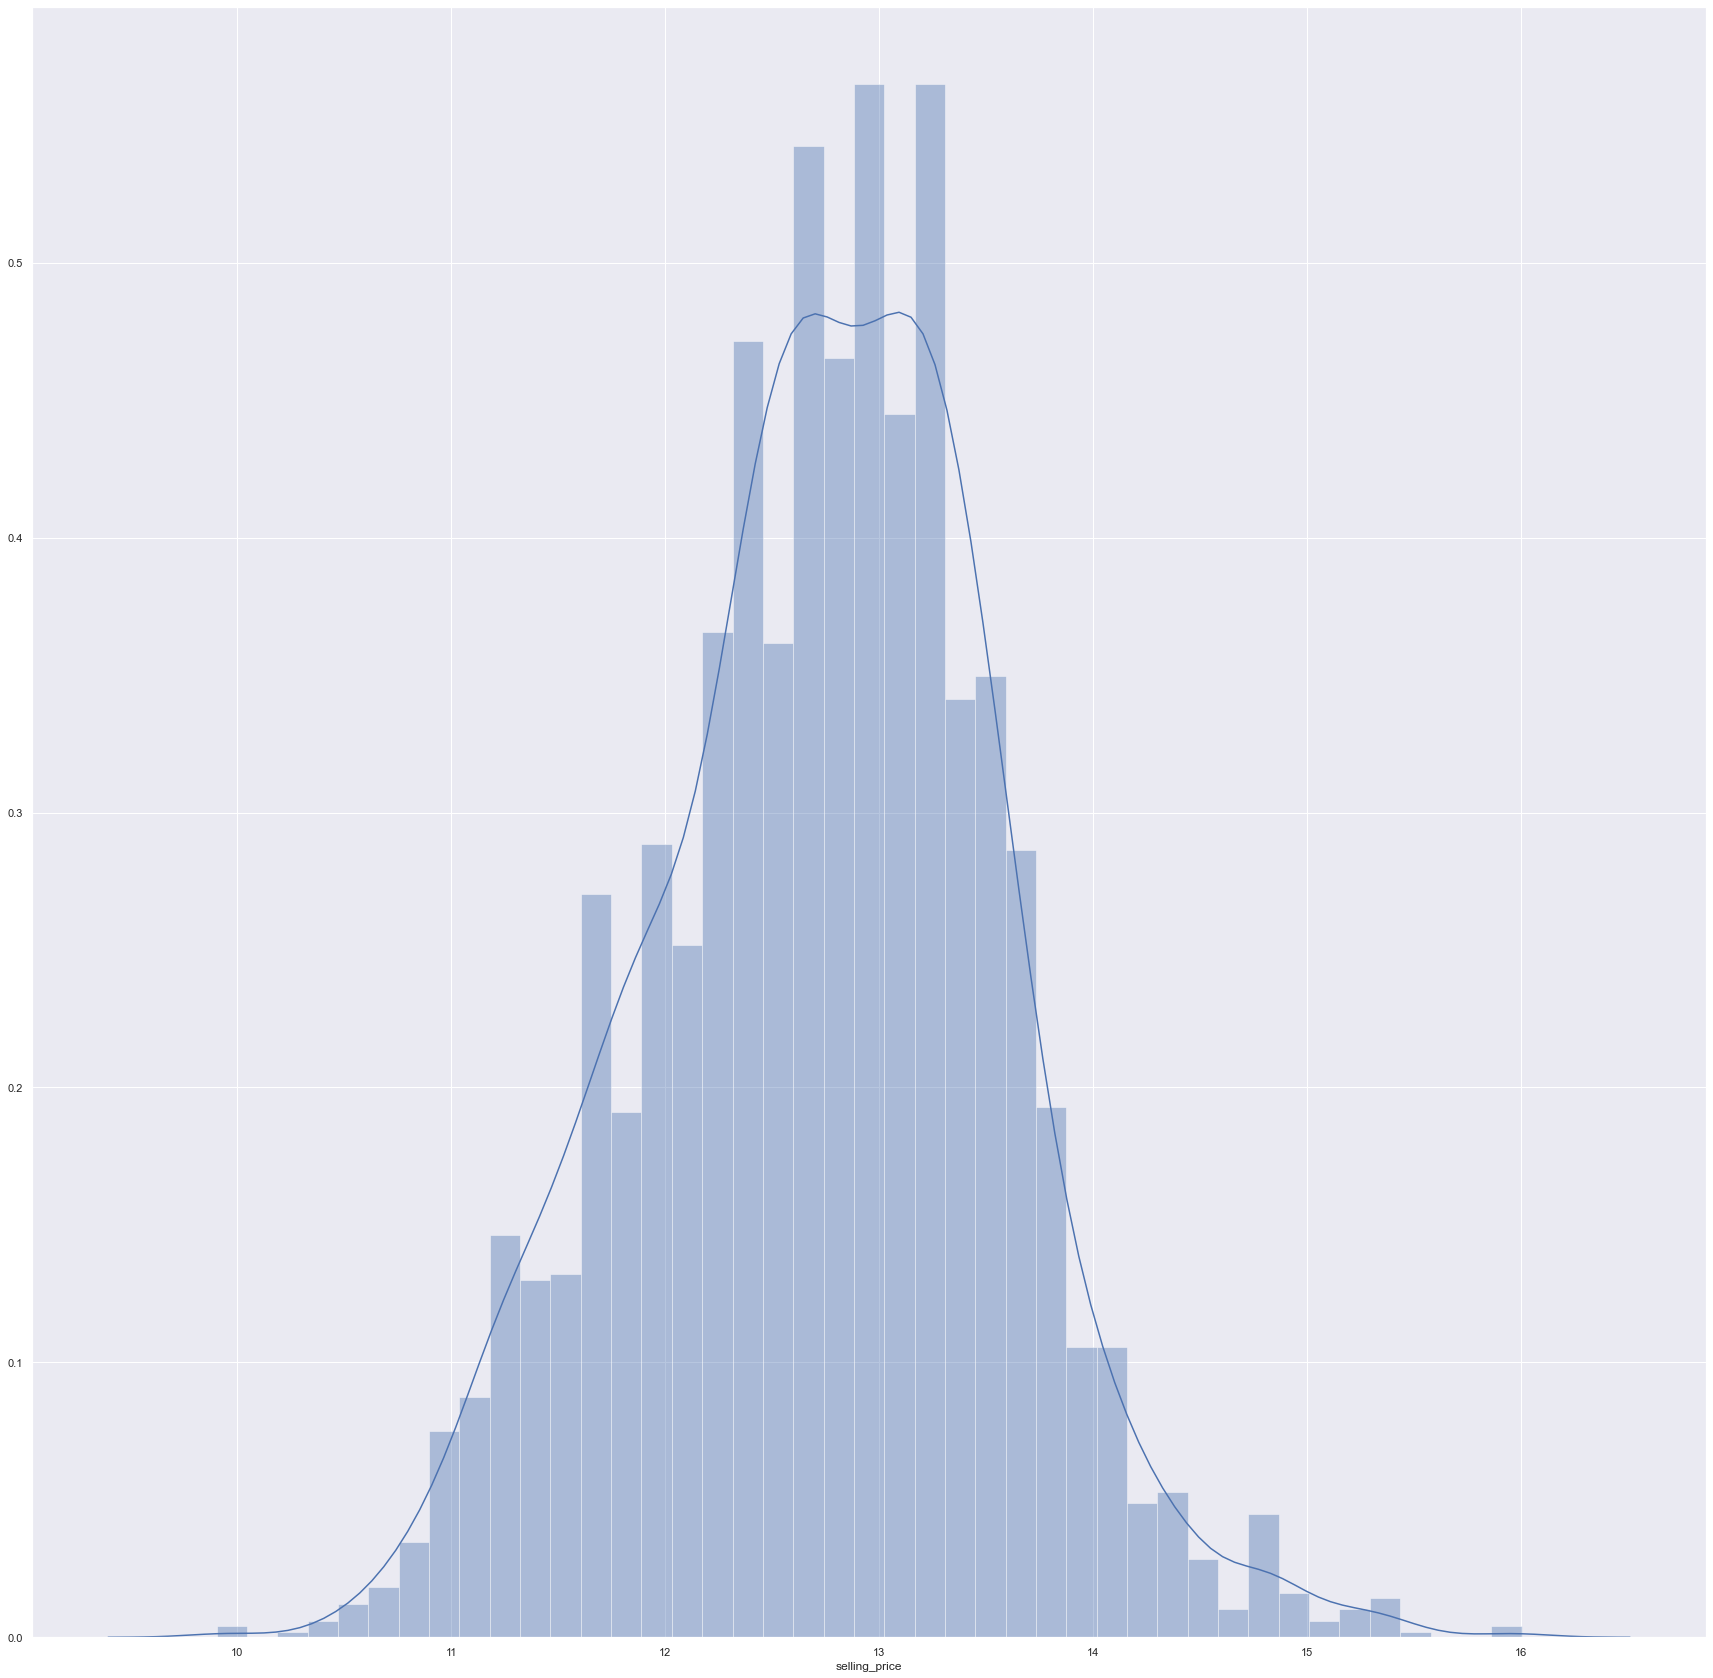

In [159]:
import seaborn as sns
# Assumption - 1 Target varibale normally distributed
sns.set_style('darkgrid')
data_removed_outlier['selling_price'] = np.log(data_removed_outlier['selling_price'])
sns.distplot(data_removed_outlier['selling_price'])

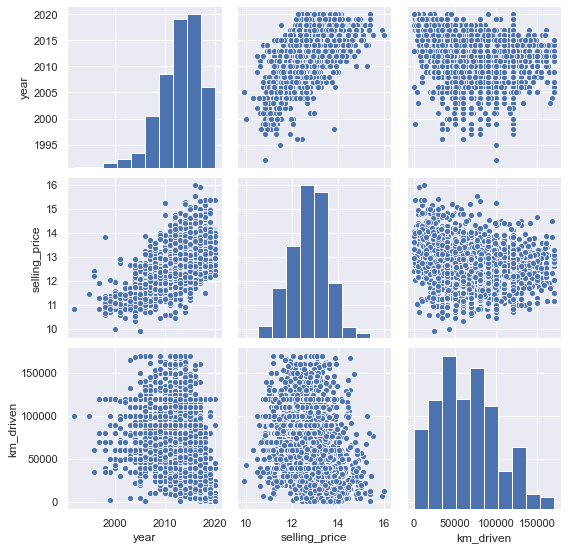

In [160]:
# Assumption - 2 Linear relationship between dependent and indep. variable
from matplotlib import rcParams
#rcParams['figure.figsize'] = 25,15
#sns.set(rcParams)
#plt.rcParams['figure.figsize']=(20,20)
sns.set(rc={'figure.figsize':(30,30)})
sns.set_style('darkgrid')
sns.pairplot(data_removed_outlier)

In [161]:
data = data_removed_outlier
data.shape

(3470, 9)

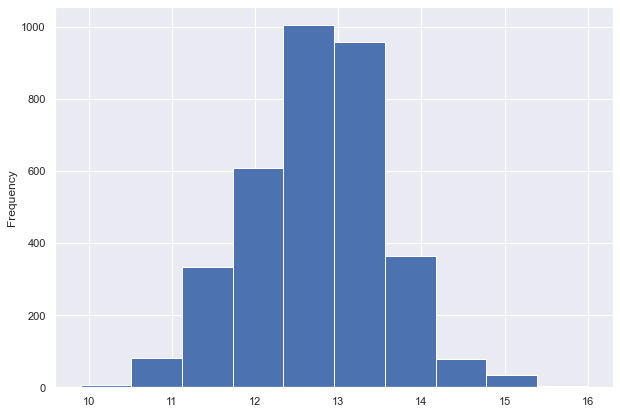

In [162]:
data_1 = data
plt.figure(figsize=(10,7))
data_1['selling_price'].plot.hist()

In [ ]:
## Check the correlation of columns
#data_corr = data_1.corr(method='pearson').abs()
#upper = data_corr.where(np.triu(np.ones(data_corr.shape),k=1).astype(np.bool))
#upper

In [ ]:
##Identify the highly co-related colums to drop (>0.8)
#drop_col = [column for column in upper.columns if any(upper[column] > 0.8)]
#drop_col
#Based on predictions can drop the columns and recheck the prediction.

In [163]:
data_1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand
0,Maruti 800 AC,2007,11.002100,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,11.813030,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,13.304685,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,12.429216,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,13.017003,141000,Diesel,Individual,Manual,Second Owner,Honda


In [164]:
#carname = data_1['name'].str.split()
#data_1['car_name'] = [' '.join(name[1:]) for name in carname]
data_1.drop('name', axis =1, inplace = True)
data_1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand
0,2007,11.002100,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,11.813030,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,13.304685,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,12.429216,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,13.017003,141000,Diesel,Individual,Manual,Second Owner,Honda


In [165]:
data_1 = pd.get_dummies(data,columns = ['fuel','seller_type','transmission','owner','Brand'])
data_1.head()

,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Daewoo,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Kia,Brand_Land,Brand_MG,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2007,11.002100,70000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2007,11.813030,50000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2012,13.304685,100000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017,12.429216,46000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014,13.017003,141000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
data_1.shape

(3470, 47)

In [167]:
## Train - Test split
from sklearn.model_selection import train_test_split
X = data_1.loc[:,data_1.columns != 'selling_price']
y = data_1['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 50)
print('Train set - ', X_train.shape)
print('Test set - ', X_test.shape)

Train set -  (2776, 46)
Test set -  (694, 46)


In [168]:
print('Train set - ', y_train.shape)
print('Test set - ', y_test.shape)

Train set -  (2776,)
Test set -  (694,)


In [169]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [170]:
# print the linreg.intercet
print('Intercept : ', linreg.intercept_)
# print the linreg.coefficient
print('Co-efficient : ', linreg.coef_)

Intercept :  -206.09336679324744
Co-efficient :  [ 1.08974748e-01 -1.57884648e-06 -1.35137445e-01  3.85045020e-01
 -9.91358556e-02 -1.03215546e-01 -4.75561732e-02 -5.55186137e-02
 -1.34238838e-01  1.89757452e-01  1.88272940e-01 -1.88272940e-01
  2.93449023e-02 -8.27655782e-02 -6.76623416e-03  1.48381039e-01
 -8.81941294e-02 -4.87899036e-01  7.83757268e-01  7.24346069e-01
 -6.93127079e-01 -6.52313758e-01 -7.03020942e-01 -5.91091958e-01
 -6.60228036e-01 -3.32124007e-01 -1.06380283e-01 -3.15453509e-01
 -1.11022302e-16  1.37763466e+00  5.15291874e-01 -3.01410428e-01
  1.42120474e+00  3.82629936e-01 -1.46719214e-01 -4.38248997e-01
  1.02154645e+00  6.34224993e-01 -3.80222816e-01 -4.27592856e-01
 -5.30218514e-01 -2.65764728e-01 -8.11493570e-01  2.05385856e-01
 -2.88951755e-01  1.06623963e+00]


In [171]:
### Predict the train value
#y_pred_train = linreg.predict(X_train_s)
y_pred_train = linreg.predict(X_train)
#pred = pd.DataFrame(np.exp(y_pred_train))
pred = pd.DataFrame(y_pred_train)
pred.columns = ['SellingPrice']
pred.head()

,SellingPrice
0,12.827049
1,13.804155
2,12.521894
3,11.677562
4,12.577139


In [172]:
### Predict the test value
y_pred_test = linreg.predict(X_test)
#y_pred_test = linreg.predict(X_test_s)
#pred_test = pd.DataFrame(np.exp(y_pred_test))
pred_test = pd.DataFrame(y_pred_test)
pred_test.columns = ['SellingPrice']
pred_test.head()

,SellingPrice
0,12.744947
1,11.838811
2,13.141836
3,13.530991
4,11.226919


In [173]:
### RMSE for train and test
from sklearn import metrics
RMSE_train = np.sqrt(metrics.mean_absolute_error(y_train,y_pred_train))
RMSE_test = np.sqrt(metrics.mean_absolute_error(y_test,y_pred_test))
# print RMSE for train
print('RMSE for train set is {}'.format(RMSE_train))
# print RMSE for test
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for train set is 0.5427419974759857
RMSE for test set is 0.5538488568855441


In [174]:
### R-Square for train and test
from sklearn.metrics import r2_score

# Calculate r2 for train 
R2_train = r2_score(y_train,y_pred_train)
# Calculate r2 for test 
R2_test = r2_score(y_test,y_pred_test)
# print r2 for train
print('R2 for train set is {}'.format(R2_train))
# print r2 for test
print('R2 for test set is {}'.format(R2_test))

R2 for train set is 0.7863542016895931
R2 for test set is 0.7900891550633329


In [175]:
from sklearn.model_selection import cross_val_score
cv_r2_scores_rf = cross_val_score(linreg, X, y, cv=5,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

[0.80017862 0.78986198 0.78342062 0.74589204 0.77687922]
Mean 5-Fold R Squared: 0.779246494631084
